<a href="https://colab.research.google.com/github/Veena9977/Practice2/blob/main/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Load the dataset to python environment
df = pd.read_csv('/content/Wholesale customers data.csv')

In [4]:
# Display the first 5 rows of your dataset
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
#Dispaly no.of columns and rows
df.shape

(440, 8)

In [6]:
#Display the information such as type,coumn name etc..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Finding missing values

In [7]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


Finding duplicates

In [8]:
df.duplicated().sum()

0

In [9]:
#Display the column names
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [10]:
#Returns the number of unique values in the Channel column
df['Channel'].nunique()

2

In [11]:
# Returns the frequency count of each unique value in the Region column
df['Region'].value_counts()

,count
Region,
3,316
1,77
2,47


In [12]:
#Display the statistical summary
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [13]:
#Print the data
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [14]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

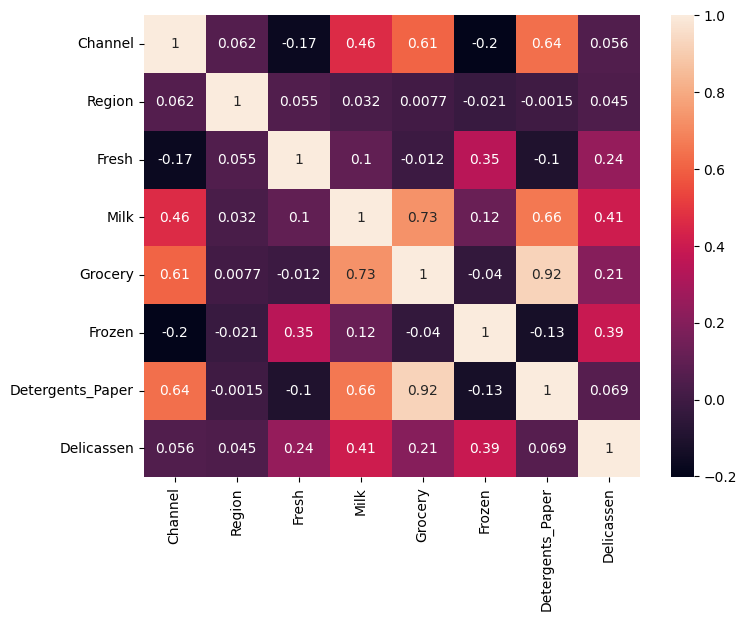

In [15]:
#Heat map of columns and find the correlation
import seaborn as sns
df = df[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']]
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

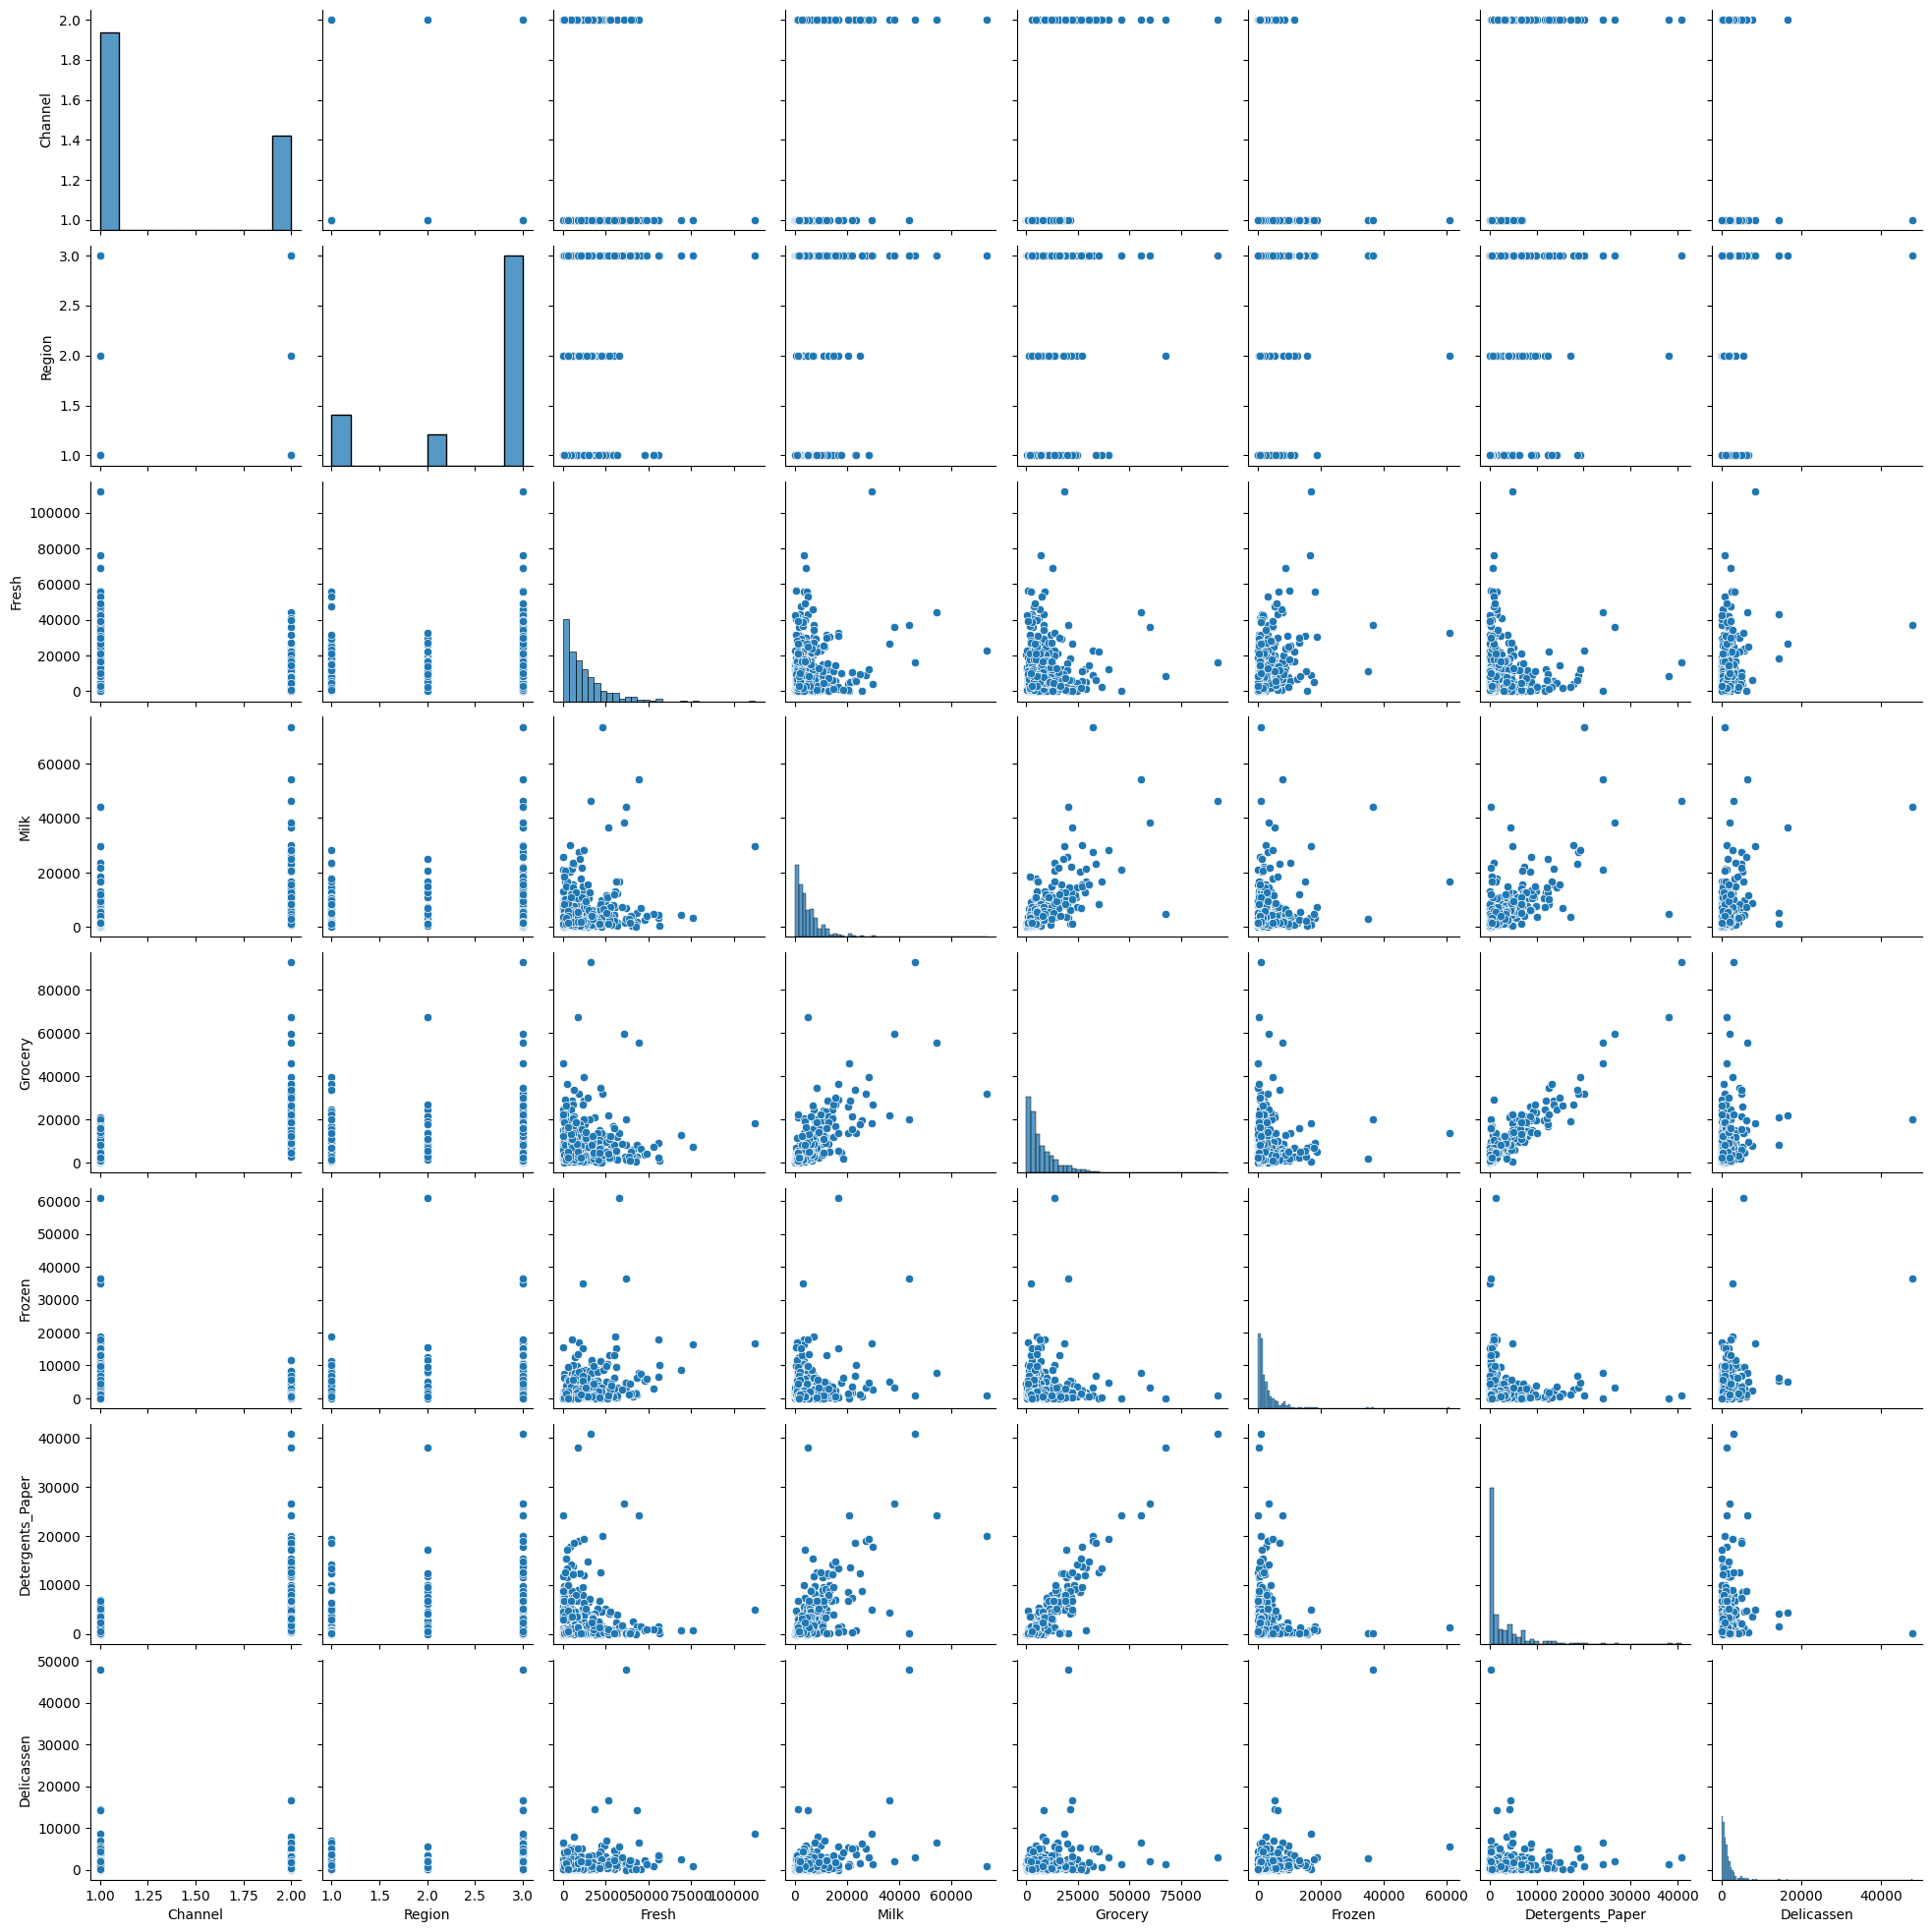

In [16]:
#Visualize the pair plot
sns.pairplot(df[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']])
plt.show()

Outlier Detection

Display the box plots for numerical columns having continous values

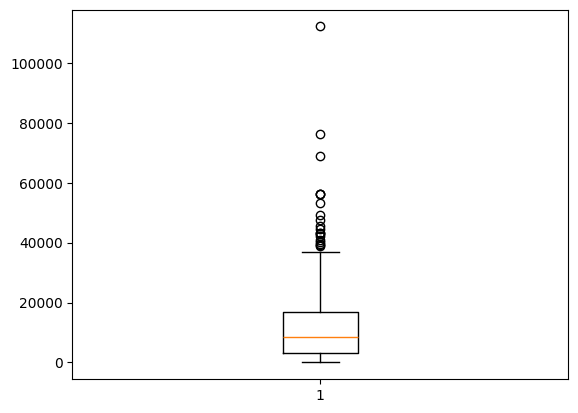

In [17]:
plt.boxplot(df['Fresh'])
plt.show()

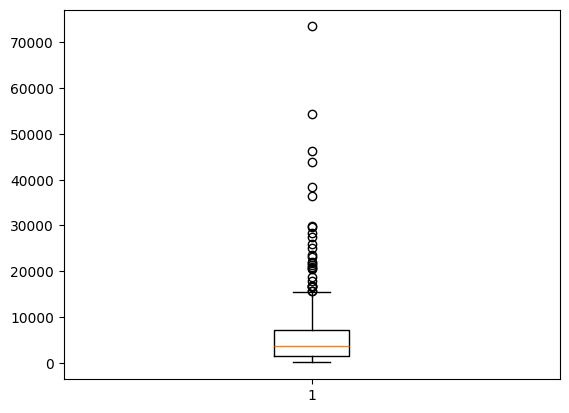

In [18]:
plt.boxplot(df['Milk'])
plt.show()

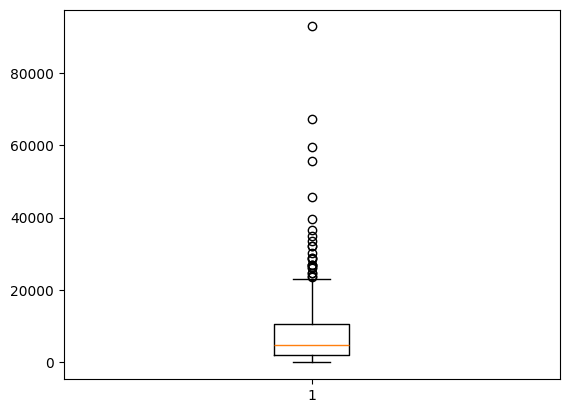

In [19]:
plt.boxplot(df['Grocery'])
plt.show()

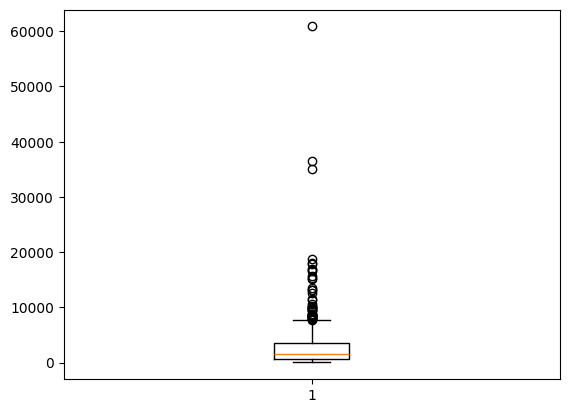

In [20]:
plt.boxplot(df['Frozen'])
plt.show()

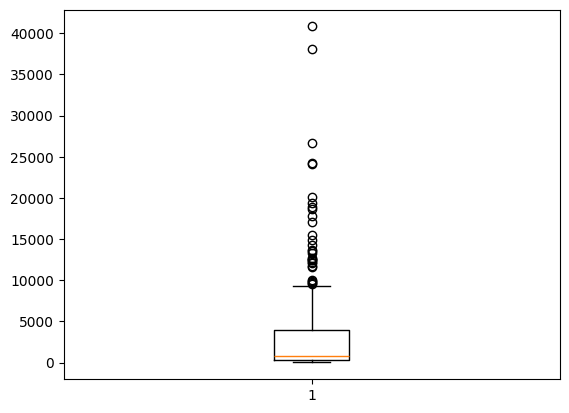

In [21]:
plt.boxplot(df['Detergents_Paper'])
plt.show()

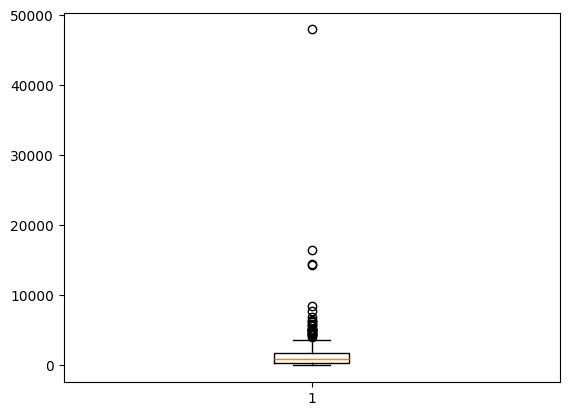

In [22]:
plt.boxplot(df['Delicassen'])
plt.show()

Outlier removal using IQR

In [23]:
#Remove outliers using IQR method for column fresh
q1 = df['Fresh'].quantile(0.25)
q3 = df['Fresh'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

In [24]:
#Filter out rows where the values in the fresh column are less than a specific value, upper_bound.
df = df[df['Fresh'] < upper_bound]

In [25]:
#Remove outliers using IQR method for column milk
q1 = df['Milk'].quantile(0.25)
q3 = df['Milk'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

In [26]:
#Filter out rows where the values in the milk column are less than a specific value, upper_bound.
df = df[df['Fresh'] < upper_bound]

In [27]:
#Remove outliers using IQR method for column Grocery.
q1 = df['Grocery'].quantile(0.25)
q3 = df['Grocery'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

In [28]:
#Filter out rows where the values in the Grocery column are less than a specific value, upper_bound.
df = df[df['Grocery'] < upper_bound]

In [29]:
#Remove outliers using IQR method for column Frozen.
q1 = df['Frozen'].quantile(0.25)
q3 = df['Frozen'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

In [30]:
#Filter out rows where the values in the Frozen column are less than a specific value, upper_bound.
df = df[df['Frozen'] < upper_bound]

In [31]:
#Remove outliers using IQR method for column Detergents_Paper.
q1 = df['Detergents_Paper'].quantile(0.25)
q3 = df['Detergents_Paper'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

In [32]:
#Filter out rows where the values in the Detergents_Paper column are less than a specific value, upper_bound.
df = df[df['Detergents_Paper'] < upper_bound]

In [33]:
#Remove outliers using IQR method for column Delicassen.
q1 = df['Delicassen'].quantile(0.25)
q3 = df['Delicassen'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

In [34]:
#Filter out rows where the values in the Delicassen column are less than a specific value, upper_bound.
df = df[df['Delicassen'] < upper_bound]

In [35]:
# selecting a subset of columns from a DataFrame df to create a new DataFrame x
x = df[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [36]:
#Display data
x

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
...,...,...,...,...,...,...,...,...
429,1,3,8607,1750,3580,47,84,2501
430,1,3,3097,4230,16483,575,241,2080
433,1,3,1982,3218,1493,1541,356,1449
438,1,3,10290,1981,2232,1038,168,2125


SCALING

In [37]:
#Import library and create a scaler.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [38]:
#num_cols that contains the names of the numerical columns
num_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']

In [39]:
#converts the data type of the columns listed in num_cols to float64
x[num_cols] = x[num_cols].astype('float64')

In [40]:
#Applies Standardization.Columns channel and region are not scaled because they are numeric but are categorical in nature .
x.loc[:, num_cols] = sc.fit_transform(x[num_cols])
x.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,1.497354,1.406938,0.197273,-0.971580,0.118354,0.602800
1,2,3,0.239225,1.448164,0.549211,0.138183,0.346755,1.206769
5,2,3,0.767406,1.032960,-0.229718,-0.647541,-0.205982,0.758619
6,2,3,1.375621,-0.321605,0.094514,-0.780884,0.290300,-0.490687
7,2,3,0.356250,0.148745,0.524310,0.071511,0.357086,2.296120


CLUSTERING MODEL

K-MEANS CLUSTERING

In [41]:
from sklearn.cluster import KMeans

Determining the optimal number of clusters for K-Means clustering using the Elbow Method.

In [42]:
#Initialize an empty list to store WCSS for each k.Loop through a range of cluster numbers.Create a KMeans model with i clusters.
#Fit the KMeans model to the data.Find the WCSS score, which represents the sum of squared distances of samples to their closest cluster center.
#
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters = i,n_init=10)
  km.fit(x)
  css = km.inertia_ #wcss score
  wcss.append(css)

In [43]:
#Print wcss scores
wcss

[1747.699218750001,
 1171.9747313547305,
 1017.2397417747517,
 904.2904635150862,
 809.5965488477897,
 744.9916167198447,
 695.9332852025955,
 654.8341126315289,
 623.3669275253671,
 597.0737607660454]

Visualization of Elbow Method

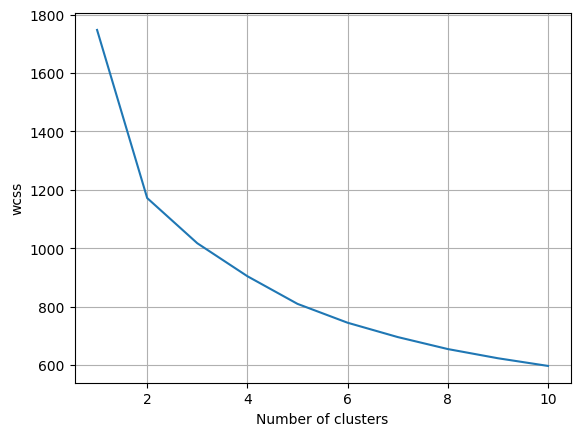

In [44]:
#WCSS starts to slow down, creating an "elbow" shape. This point represents the optimal number of clusters for K-Means.
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.grid()
plt.show()

In [45]:
#Fit K-Means model with 7 clusters
km = KMeans(n_clusters=7, n_init =10)

In [46]:
km.fit(x)

KMeans(n_clusters=7, n_init=10)

In [47]:
#Predict the cluster labels for each data point
cluster_labels=km.predict(x)

In [48]:
#Display the cluster labels
cluster_labels

array([0, 0, 0, 1, 0, 4, 3, 3, 1, 1, 2, 1, 6, 1, 1, 4, 4, 2, 3, 2, 2, 2,
       2, 3, 0, 6, 4, 2, 4, 2, 1, 0, 1, 6, 3, 6, 4, 6, 1, 0, 1, 4, 1, 2,
       0, 1, 1, 2, 4, 4, 4, 4, 6, 3, 3, 0, 1, 1, 2, 3, 0, 1, 3, 1, 1, 1,
       1, 6, 4, 1, 1, 4, 4, 1, 1, 1, 1, 6, 4, 4, 1, 1, 6, 4, 0, 4, 0, 2,
       0, 1, 1, 2, 3, 4, 1, 1, 2, 4, 2, 4, 0, 0, 1, 6, 0, 2, 4, 1, 6, 2,
       0, 1, 4, 2, 1, 2, 5, 5, 3, 5, 5, 2, 5, 5, 5, 5, 5, 2, 3, 5, 5, 2,
       6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 0, 0, 3, 5, 5, 5, 5, 5, 6, 5, 6,
       2, 3, 2, 5, 6, 5, 5, 4, 4, 6, 4, 0, 1, 4, 1, 6, 2, 5, 5, 0, 4, 2,
       2, 2, 2, 3, 5, 2, 6, 1, 6, 4, 1, 4, 1, 1, 1, 6, 4, 6, 6, 1, 2, 0,
       4, 4, 4, 3, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 0, 1, 4, 1, 0, 1, 4,
       3, 4, 4, 6, 1, 4, 1, 1, 6, 4, 4, 1, 1, 0, 6, 1, 6, 1, 3, 1, 0, 4,
       6, 0, 2, 0, 2, 1, 2, 3, 4, 0, 0, 4, 1, 4], dtype=int32)

In [49]:
#Count the occurrences of each cluster label
pd.Series(cluster_labels).value_counts()

,count
1,57
4,54
2,36
5,32
0,30
6,28
3,19


In [50]:
#Get the indices of the data points that belong to cluster 0
cluster_indices = np.where(cluster_labels == 0)[0]

In [51]:
cluster_indices

array([  0,   1,   2,   4,  24,  31,  39,  44,  55,  60,  84,  86,  88,
       100, 101, 104, 110, 143, 144, 165, 173, 197, 213, 217, 233, 240,
       243, 245, 251, 252])

In [52]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
...,...,...,...,...,...,...,...,...
429,1,3,8607,1750,3580,47,84,2501
430,1,3,3097,4230,16483,575,241,2080
433,1,3,1982,3218,1493,1541,356,1449
438,1,3,10290,1981,2232,1038,168,2125


In [53]:
# Add the cluster labels as a new column to the original DataFrame
df['Cluster_labels']=cluster_labels

In [54]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
5,2,3,9413,8259,5126,666,1795,1451,0
6,2,3,12126,3199,6975,480,3140,545,1
7,2,3,7579,4956,9426,1669,3321,2566,0
...,...,...,...,...,...,...,...,...,...
429,1,3,8607,1750,3580,47,84,2501,0
430,1,3,3097,4230,16483,575,241,2080,0
433,1,3,1982,3218,1493,1541,356,1449,4
438,1,3,10290,1981,2232,1038,168,2125,1


In [55]:
#Filter the rows of your DataFrame df where the cluster label is 0
target_cluster_data = df[df['Cluster_labels'] == 0]

In [56]:
target_cluster_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
5,2,3,9413,8259,5126,666,1795,1451,0
7,2,3,7579,4956,9426,1669,3321,2566,0
48,2,3,11519,6152,10868,584,5121,1476,0
59,1,3,6137,5360,8040,129,3084,1603,0
74,2,3,8190,6343,9794,1285,1901,1780,0
82,2,3,10362,9232,11009,737,3537,2342,0
102,2,3,2932,6459,7677,2561,4573,1386,0
108,2,3,1531,8397,6981,247,2505,1236,0


In [57]:
#Prepare the new data excluding categorical features that are numeric.Scale the new data using the same scaler used for training
#and assign the non-scaled categorical data (Channel, Region) to non_scaled_data.Combine scaled and non-scaled data.Predict the cluster label for the new data point
#Return the predicted cluster label
def predict_cluster(Channel, Region, Fresh, Milk, Grocery, Frozen,Detergents_Paper, Delicassen):
 new_data = [[Fresh, Milk, Grocery, Frozen,Detergents_Paper, Delicassen]]
 new_data_scaled = sc.transform(new_data)
 non_scaled_data = pd.DataFrame([[Channel, Region]], columns=['Channel', 'Region'])
 x = np.concatenate((new_data_scaled, non_scaled_data), axis=1)
 cluster = km.predict(x)
 return cluster[0]

In [58]:
#Predict the cluster of a new customer based on the features provided.
new_customer_Channel = 1
new_customer_Region = 2
new_customer_Milk = 300
new_customer_Fresh = 500
new_customer_Grocery = 250
new_customer_Frozen = 200
new_customer_Detergents_Paper = 100
new_customer_Delicassen = 50

predicted_cluster = predict_cluster(new_customer_Channel,new_customer_Region,new_customer_Milk,new_customer_Fresh,new_customer_Grocery,new_customer_Frozen,new_customer_Detergents_Paper,new_customer_Delicassen)
print(f'The customer belongs to cluster: {predicted_cluster}')

The customer belongs to cluster: 5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


 Hierarchical Clustering

In [59]:
#Importing libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [60]:
#Perform hierarchical clustering using the Ward method
mergings = linkage(x,method="ward")

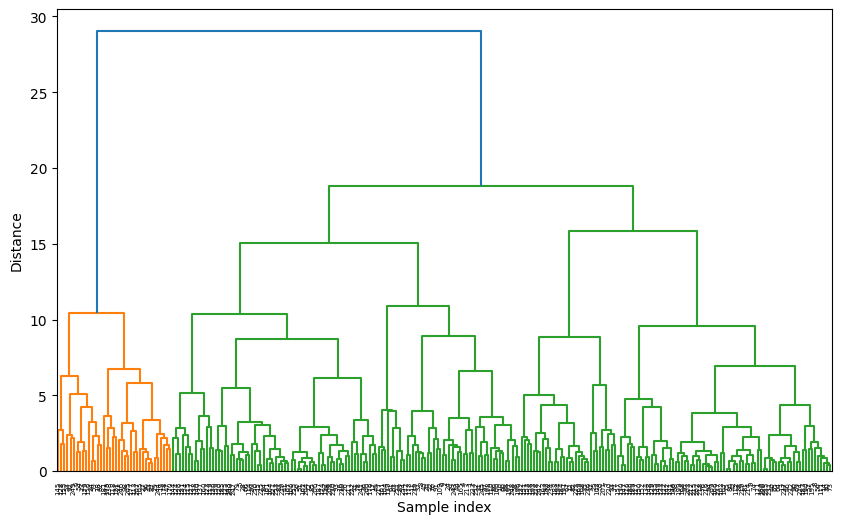

In [61]:
# Plot the dendrogram to visualize and find the threshold value
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

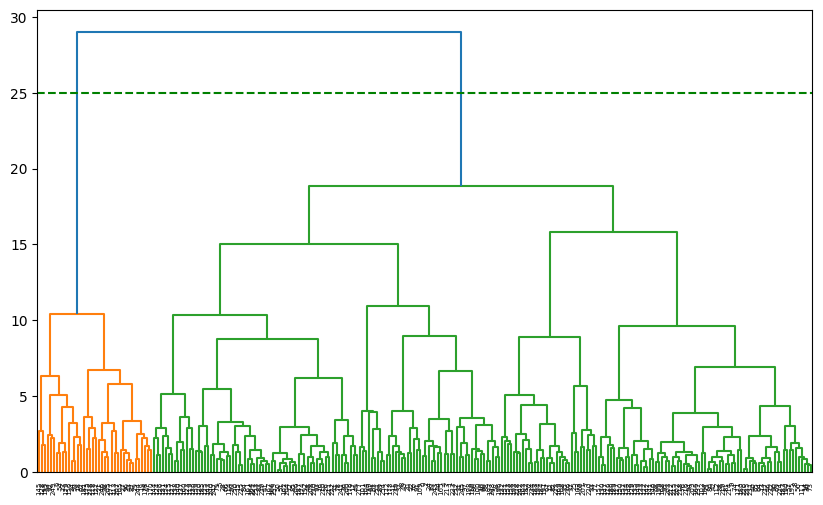

In [62]:
# y=25 indicates that here it is choosed to cut the dendrogram at this distance threshold,
# above which clusters will not be merged.Plot the dendrogram.
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(25,color='green',linestyle='--')
plt.show()

In [63]:
# Cut the hierarchical clustering dendrogram at a distance threshold of 25.
#This function will assign cluster labels to the data points based on where the dendrogram is "cut" at the specified distance.
cluster_labels = fcluster(mergings,25,criterion="distance")

In [64]:
#Print the cluster labels for each sample
cluster_labels

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2], dtype=int32)

In [65]:
from sklearn.metrics import silhouette_score

In [66]:
#Assuming x is the dataset and cluster_labels contains the cluster labels from hierarchical clustering.Print the silhouette score
silhouette_avg1 = silhouette_score(x, cluster_labels)
print(silhouette_avg1)

0.32820403950582033


 Agglomerative Clustering(type of hierarchical clustering algorithm)

In [67]:
from sklearn.cluster import AgglomerativeClustering

In [68]:
#Apply Agglomerative Clustering and can choose the number of clusters 'n_clusters' based on the preference.
agglomerative_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Cluster'] = agglomerative_clustering.fit_predict(x)


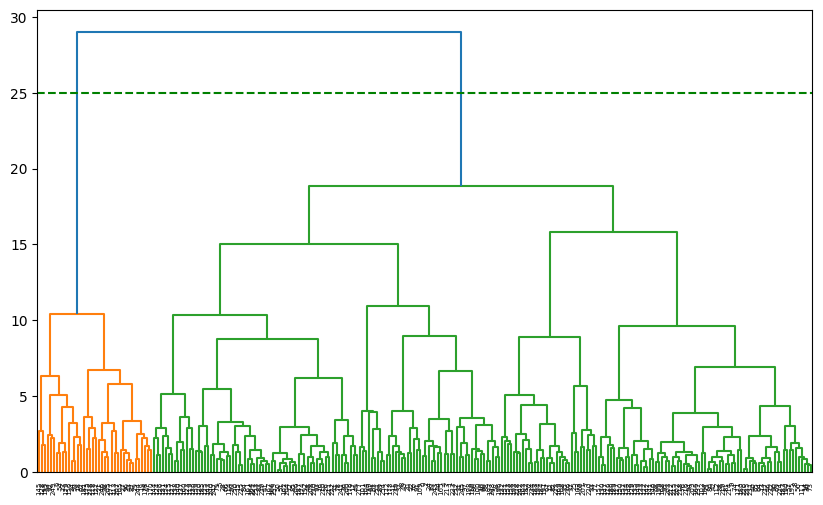

In [69]:
#Visualize the clustering
plt.figure(figsize=(10, 6))
dendrogram(mergings)
plt.axhline(25,color='green',linestyle='--')
plt.show()

DBSCAN

In [70]:
from sklearn.cluster import DBSCAN

In [71]:
# Apply DBSCAN.
clustering = DBSCAN(eps= 1, min_samples = 5).fit(x)

In [72]:
#Add cluster labels to DataFrame.
df['Cluster_Label'] = clustering.labels_

In [73]:
#Print the data
print(df)

     Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669  9656     7561     214              2674   
1          2       3   7057  9810     9568    1762              3293   
5          2       3   9413  8259     5126     666              1795   
6          2       3  12126  3199     6975     480              3140   
7          2       3   7579  4956     9426    1669              3321   
..       ...     ...    ...   ...      ...     ...               ...   
429        1       3   8607  1750     3580      47                84   
430        1       3   3097  4230    16483     575               241   
433        1       3   1982  3218     1493    1541               356   
438        1       3  10290  1981     2232    1038               168   
439        1       3   2787  1698     2510      65               477   

     Delicassen  Cluster_labels  Cluster  Cluster_Label  
0          1338               0        2             -1  
1          1776    

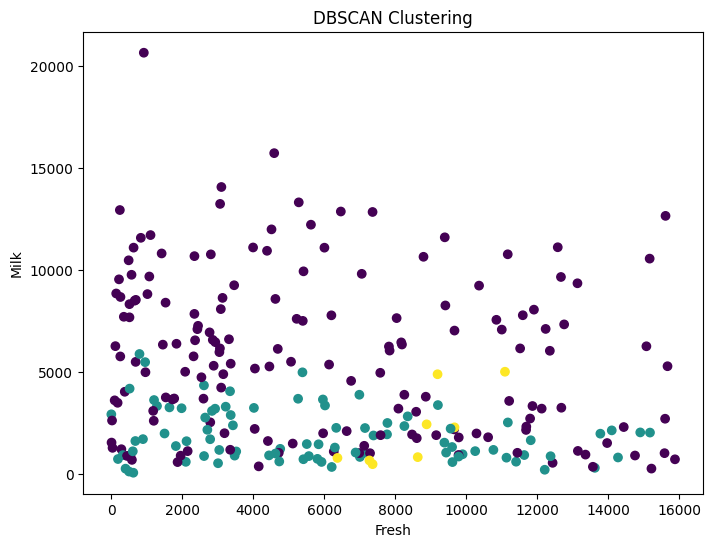

In [74]:
# Visualize the clustering using scatter plot of fresh versus milk
plt.figure(figsize=(8, 6))
plt.scatter(df['Fresh'], df['Milk'], c= df['Cluster_Label'])
plt.title('DBSCAN Clustering')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

PCA(Principal Component Analysis)

In [75]:
from sklearn.decomposition import PCA

In [76]:
pc = PCA()

In [77]:
# Apply PCA to your data 'x'
pc_array = pc.fit_transform(x)

In [78]:
#Display the array elements
pc_array

array([[ 1.01533864,  0.73097186, -1.49435371, ...,  0.92457386,
        -0.22400017,  0.38746649],
       [ 1.55886261,  1.05900977, -0.60613108, ...,  0.69898743,
        -0.10345548,  0.36855176],
       [ 0.52906993,  0.56481585, -1.23756505, ...,  0.86328145,
        -0.34369708,  0.53240933],
       ...,
       [-0.80921699, -0.1518357 , -0.50328259, ...,  0.24298184,
        -0.13798196, -0.0642711 ],
       [-1.06219883,  1.15793695, -1.76942376, ..., -0.1916941 ,
        -0.05054318, -0.10101055],
       [-1.15827404, -1.80885241, -0.278049  , ...,  0.06421034,
         0.06761269, -0.01331471]])

In [79]:
#Dispaly the no .of rows and columns
pc_array.shape

(256, 8)

In [80]:
# Convert the PCA result into a DataFrame.There are 8 features in the orginal dataset.
pc_array = pd.DataFrame(pc_array , columns = ['pc1' , 'pc2' , 'pc3' , 'pc4' , 'pc5' , 'pc6' , 'pc7' , 'pc8'])

In [81]:
#Compute the correlation matrix of the principal components
pc_array.corr().round()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
pc1,1.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
pc2,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
pc3,-0.0,-0.0,1.0,0.0,0.0,0.0,0.0,0.0
pc4,0.0,0.0,0.0,1.0,0.0,0.0,-0.0,-0.0
pc5,-0.0,-0.0,0.0,0.0,1.0,-0.0,0.0,-0.0
pc6,-0.0,-0.0,0.0,0.0,-0.0,1.0,-0.0,0.0
pc7,0.0,-0.0,0.0,-0.0,0.0,-0.0,1.0,-0.0
pc8,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,1.0


In [82]:
#Computed Explained variance and explained variance ratio
pc.explained_variance_

array([2.89282258, 1.29326645, 0.80564593, 0.77822949, 0.59342487,
       0.30455975, 0.11793709, 0.06783625])

In [83]:
#Convert to percentage
pc.explained_variance_ratio_*100

array([42.20804992, 18.86954812, 11.75486659, 11.35484407,  8.65843169,
        4.44371297,  1.72077426,  0.98977237])

In [84]:
#Find the total
42.20804992+ 18.86954812+ 11.75486659+ 11.35484407+ 8.65843169+ 4.44371297+ 1.72077426+ 0.98977237

99.99999999

In [85]:
#Apply PCA with 3 components.
pc1 = PCA(n_components=3)

In [86]:
# Apply PCA to your data 'x'
pc_array1 = pc1.fit_transform(x)

In [87]:
#Dispaly the elements
pc_array1

array([[ 1.01533864e+00,  7.30971862e-01, -1.49435371e+00],
       [ 1.55886261e+00,  1.05900977e+00, -6.06131085e-01],
       [ 5.29069930e-01,  5.64815851e-01, -1.23756505e+00],
       [-4.38692064e-02, -7.42027204e-03, -7.46759862e-01],
       [ 1.06921922e+00,  1.57017198e+00, -1.29018559e+00],
       [-2.61552405e-01, -6.51768816e-01, -6.62713193e-01],
       [ 3.64847351e+00,  9.84669892e-01, -7.18171000e-01],
       [ 1.73282670e+00,  1.61461134e+00,  1.20375978e+00],
       [-1.22456113e+00,  4.34794938e-01, -4.75537748e-01],
       [-1.24875853e+00, -4.69433112e-01, -7.73730194e-01],
       [ 2.11782946e+00, -9.51840534e-01, -4.79161593e-01],
       [-9.92187636e-02, -5.27606143e-01, -3.72565483e-01],
       [-1.60683603e+00,  3.52436709e-01,  8.92131374e-01],
       [-1.62425191e+00,  1.00165633e+00,  3.20811716e-01],
       [-1.68239514e+00,  1.41561585e-01, -1.10997261e+00],
       [-5.92782162e-01, -1.59801792e-01,  1.42230444e-01],
       [-1.03427119e+00, -1.54043740e+00

In [88]:
#Computed Explained variance and explained variance ratio
pc1.explained_variance_

array([2.89282258, 1.29326645, 0.80564593])

In [89]:

pc1.explained_variance_ratio_*100

array([42.20804992, 18.86954812, 11.75486659])

In [90]:
#Find the total
42.20804992+ 18.86954812+ 11.75486659

72.83246463

INFERENCE : The PCA transformed dataset captures about 72.83% variability in the original cleaned dataset.

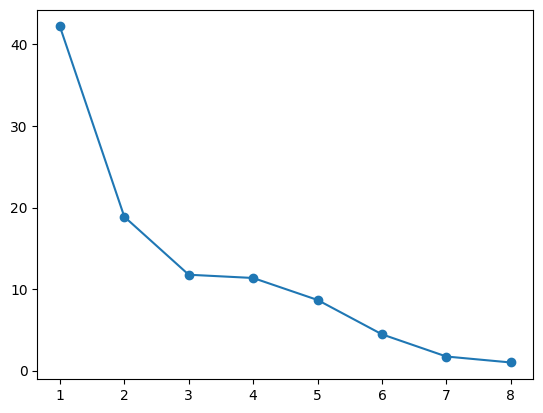

In [91]:
# Plot the explained variance ratio
plt.plot([1,2,3,4,5,6,7,8],pc.explained_variance_ratio_*100, 'o-')
plt.show()